## Importación de librerías

In [1]:
# Data processing
# -----------------------------------------------------------------------
import pandas as pd

# Visualization  
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Model selection and evaluation  
# -----------------------------------------------------------------------
from sklearn.model_selection import train_test_split

# Regression models  
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression

# Metrics  
# -----------------------------------------------------------------------
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Carga de datos

In [2]:
df = pd.read_csv('df_clasificacion.csv', index_col=0)
df.head()

,nota_anterior,tasa_asistencia,horas_sueno,edad,nivel_dificultad,tiene_tutor,nota_final,horario_estudio_preferido_Mañana,horario_estudio_preferido_Noche,horario_estudio_preferido_Tarde,horario_estudio_preferido_Unknown,estilo_aprendizaje_Auditivo,estilo_aprendizaje_Kinestésico,estilo_aprendizaje_Lectura/Escritura,estilo_aprendizaje_Unknown,estilo_aprendizaje_Visual,aprobado
horas_estudio_semanal,,,,,,,,,,,,,,,,,
8.957476,0.269009,0.833002,0.445949,0.636364,0.5,1.0,0.777143,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
11.042524,0.726082,0.793121,0.102807,0.000000,0.0,0.0,0.600000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4.510776,0.862624,0.682795,0.625874,0.636364,0.5,0.0,0.714286,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6.647213,0.741118,0.785623,0.765471,0.454545,0.5,0.0,0.688571,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1.000000,0.517917,0.431749,0.445307,0.272727,1.0,0.0,0.514286,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


## Separación del conjunto de datos

In [3]:
# Variable objetivo
tv = 'aprobado'

# Definimos las variables predictoras (X) y la variable objetivo (y)
X = df.drop(columns=[tv])  # Características
y = df[tv]  # Etiqueta o resultado

In [4]:
# Dividimos los datos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostramos los tamaños de los conjuntos resultantes
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (800, 16)
Tamaño del conjunto de prueba: (200, 16)


## Entrenamiento del modelo

In [5]:
# Crear una instancia de LogisticRegression
model = LogisticRegression(penalty='l2', C=1.0,  max_iter=200)

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

c:\Users\troya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'l2'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multiclass`

In [6]:
# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

In [7]:
# Obtener probabilidades de predicción
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva

## Validación del modelo

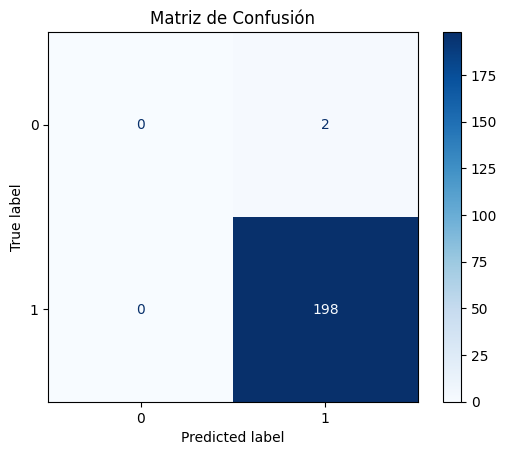

In [8]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión")
plt.show()

En esta matrix podemos ver qué acierta y qué falla el modelo:

- 198 casos eran realmente 1 (aprobado) y el modelo predijo 1. Son aciertos.
- 2 casos eran realmente 0 (no aprobado) pero el modelo predijo 1. Son fallos (falsos positivos).
- 0 casos fueron predichos como 0 (ni aciertos ni fallos en esa clase).

De los 200, el modelo está prediciendo casi todo como `aprobado` = 1, y por eso vemos que el modelo acierta mucho.

## Métricas

In [9]:
# Calcular predicciones para el conjunto de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Obtener las probabilidades de predicción
y_train_proba = model.predict_proba(X_train)
y_test_proba = model.predict_proba(X_test)

In [10]:
# Cálculo de métricas
metrics = {
    "train": {
        "Accuracy": accuracy_score(y_train, y_train_pred),
        "Precision": precision_score(y_train, y_train_pred),
        "Recall": recall_score(y_train, y_train_pred),
        "F1-score": f1_score(y_train, y_train_pred),
    },
    "test": {
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred),
        "Recall": recall_score(y_test, y_test_pred),
        "F1-score": f1_score(y_test, y_test_pred),
    },
}

# Mostrar métricas en un DataFrame
df_metrics = pd.DataFrame(metrics).T

In [11]:
df_metrics.round(2)

,Accuracy,Precision,Recall,F1-score
train,0.99,0.99,1.0,0.99
test,0.99,0.99,1.0,0.99


Calcula métricas en train y en test:

- Accuracy = 0.99.
- Precision = 0.99.
- Recall = 1.0.
- F1-score = 0.99.

Podemos ver que el modelo acierta casi siempre.

In [12]:
# Cálculo de métricas con desbalanceo
metrics_weighted = {
    "train": {
        "Accuracy": accuracy_score(y_train, y_train_pred),
        "Precision": precision_score(y_train, y_train_pred, average="weighted"),
        "Recall": recall_score(y_train, y_train_pred, average="weighted"),
        "F1-score": f1_score(y_train, y_train_pred, average="weighted"),
    },
    "test": {
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred, average="weighted"),
        "Recall": recall_score(y_test, y_test_pred, average="weighted"),
        "F1-score": f1_score(y_test, y_test_pred, average="weighted"),
    },
}

# Mostrar métricas en un DataFrame
df_metrics_weighted = pd.DataFrame(metrics_weighted).T


c:\Users\troya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\troya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [13]:
df_metrics_weighted.round(2)

,Accuracy,Precision,Recall,F1-score
train,0.99,0.98,0.99,0.98
test,0.99,0.98,0.99,0.99


También calcula la versión “weighted” para intentar tener en cuenta los desbalances.

- Accuracy = 0.99.
- Precision = 0.98.
- Recall = 0.99.
- F1-score = 0.99.

Podemos ver que el modelo acierta también así casi siempre.

## Importancia de características

In [14]:
# Crear DataFrame con los coeficientes
coef_df = pd.DataFrame({'Feature': X.columns.to_list(), 'Coefficient': model.coef_[0]})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False, key=abs)  # Ordenar por magnitud

In [15]:
coef_df.sort_values(by='Coefficient', ascending=False, key=abs)

,Feature,Coefficient
6,nota_final,2.540475
0,nota_anterior,1.309363
5,tiene_tutor,1.124154
1,tasa_asistencia,0.659290
9,horario_estudio_preferido_Tarde,-0.438874
10,horario_estudio_preferido_Unknown,0.430704
4,nivel_dificultad,-0.430692
14,estilo_aprendizaje_Unknown,0.337106
8,horario_estudio_preferido_Noche,-0.261568
15,estilo_aprendizaje_Visual,-0.248562


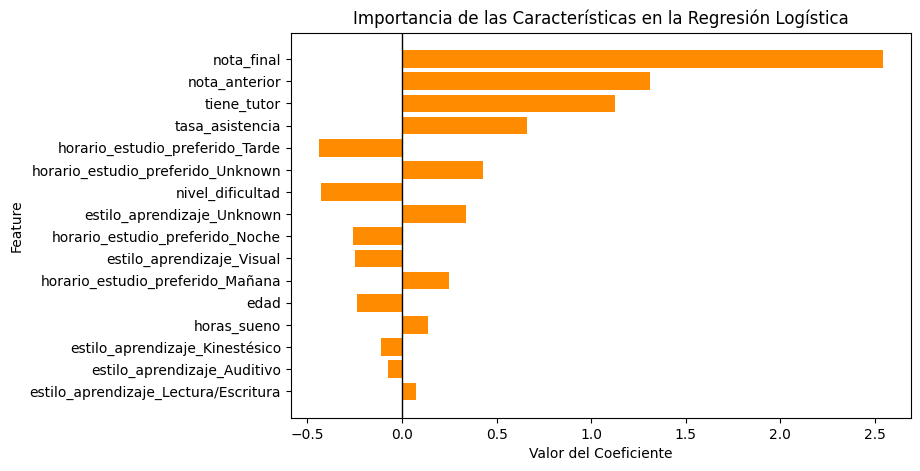

In [16]:
# Visualizar los coeficientes en un gráfico de barras
plt.figure(figsize=(8, 5))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='darkorange')
plt.xlabel("Valor del Coeficiente")
plt.ylabel("Feature")
plt.title("Importancia de las Características en la Regresión Logística")
plt.axvline(0, color='black', linewidth=1)  # Línea en el 0 para referencia
plt.gca().invert_yaxis()  # Invertir eje para que la más importante esté arriba
plt.show()

Este gráfico muestra qué variables empujan al modelo de clasificación a predecir `aprobado` o no aprobado:

- Las barras a la derecha (coeficiente positivo) aumentan la probabilidad de aprobar.
- Las barras a la izquierda (coeficiente negativo) aumentan la probabilidad de no aprobar.

La característica `nota_final` es con diferencia la más influyente. Lo hace positivamente.

## Entrenamiento final

In [17]:
import joblib

# Entrenar el modelo con todo el conjunto de datos
model_final = LogisticRegression(penalty='l2', C=1.0,  max_iter=200,  n_jobs=-1)
model_final.fit(X, y)

# Guardar el modelo entrenado para producción
joblib.dump(model_final, "modelo_clasificacion.pkl")

c:\Users\troya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\troya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


['modelo_clasificacion.pkl']

In [18]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Definir modelos de regresión logística con regularización
models = {
    "Logistic (L2 - Ridge)": LogisticRegression(penalty='l2', C=1.0, solver='liblinear'),
    "Logistic (L1 - Lasso)": LogisticRegression(penalty='l1', C=0.1, solver='liblinear'),
    "Logistic (ElasticNet)": LogisticRegression(penalty='elasticnet', C=0.1, l1_ratio=0.5, solver='saga'),
}

# Inicializar diccionario para métricas
metrics_results = {}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)  # Entrenar el modelo

    # Predecir en entrenamiento y prueba
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcular métricas ponderadas
    metrics_results[name] = {
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Train Precision (Weighted)": precision_score(y_train, y_train_pred, average='weighted'),
        "Train Recall (Weighted)": recall_score(y_train, y_train_pred, average='weighted'),
        "Train F1 (Weighted)": f1_score(y_train, y_train_pred, average='weighted'),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Test Precision (Weighted)": precision_score(y_test, y_test_pred, average='weighted'),
        "Test Recall (Weighted)": recall_score(y_test, y_test_pred, average='weighted'),
        "Test F1 (Weighted)": f1_score(y_test, y_test_pred, average='weighted'),
    }

# Convertir métricas a DataFrame
df_metrics = pd.DataFrame(metrics_results).T

c:\Users\troya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\troya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\troya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples

In [19]:
df_metrics.round(2)

,Train Accuracy,Train Precision (Weighted),Train Recall (Weighted),Train F1 (Weighted),Test Accuracy,Test Precision (Weighted),Test Recall (Weighted),Test F1 (Weighted)
Logistic (L2 - Ridge),0.99,0.98,0.99,0.98,0.99,0.98,0.99,0.99
Logistic (L1 - Lasso),0.99,0.98,0.99,0.98,0.99,0.98,0.99,0.99
Logistic (ElasticNet),0.99,0.98,0.99,0.98,0.99,0.98,0.99,0.99


En esta tabla podemos ver la comparación de las 3 variantes de regresión logística (Ridge/Lasso/ElasticNet) y sus métricas en train y test:

- Todas sacan = 0.99 de Accuracy y = 0.98–0.99 en Precision/Recall/F1 (Weighted) tanto en entrenamiento como en prueba.
- Como train y test son casi iguales, no parece haber sobreajuste: el modelo rinde bien con datos nuevos.

### Conclusión final

Viendo la matriz de confusión (casi todo predicho como 1) y porque aparece `nota_final` como variable importante, estos números tan altos probablemente se deben a que el modelo lo tiene “muy fácil” (clases muy desbalanceadas y/o “fuga de información”).